<a href="https://colab.research.google.com/github/liscolme/EscapeEarth/blob/main/Interns/Elise/BLS_Function_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
###################################
!pip install lightkurve
import lightkurve as lk
import numpy as np
import pandas as pd

      Successfully uninstalled scipy-1.4.1


In [ ]:
import astropy.units as u
from astropy.timeseries import BoxLeastSquares

In [ ]:
!ls /content/gdrive/MyDrive/EscapeEarthData

#/content/gdrive/My \Drive/EscapeEarthData/Sec14_cleaned/{ticid}/lc.fits
#/content/gdrive/My \Drive/EscapeEarthData/Sec15_cleaned/{ticid}/lc.fits

#/content/gdrive/My \Drive/EscapeEarthData/all_targets_S014_v1.csv

ls: cannot access '/content/gdrive/MyDrive/EscapeEarthData': No such file or directory


In [ ]:
#timestamps
t = np.random.uniform(0, 20, 2000)
#observations
y = np.ones_like(t) - 0.1*((t%3)<0.2) + 0.01*np.random.randn(len(t))
model = BoxLeastSquares(t * u.day, y, dy=0.01)
periodogram = model.autopower(0.2) 

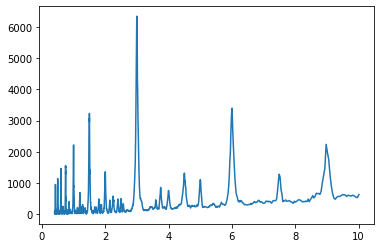

In [ ]:
import matplotlib.pyplot as plt                  
plt.plot(periodogram.period, periodogram.power)  

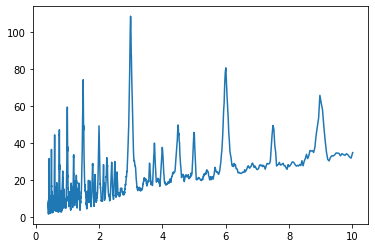

In [ ]:
model = BoxLeastSquares(t * u.day, y, dy=0.01)
periodogram = model.autopower(0.2, objective="snr")
plt.plot(periodogram.period, periodogram.power)  

# This objective will generally produce a periodogram that is qualitatively similar to the log likelihood spectrum
# but it has been used to improve the reliability of transit search in the presence of correlated noise.

**Period Grid**

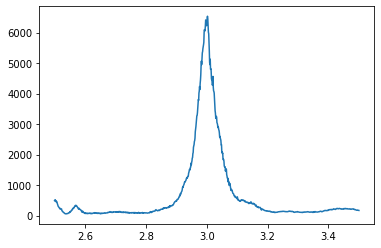

In [ ]:
# It is possible to provide a specific period grid as follows:
model = BoxLeastSquares(t * u.day, y, dy=0.01)
periods = np.linspace(2.5, 3.5, 1000) * u.day
periodogram = model.power(periods, 0.2)
plt.plot(periodogram.period, periodogram.power)  

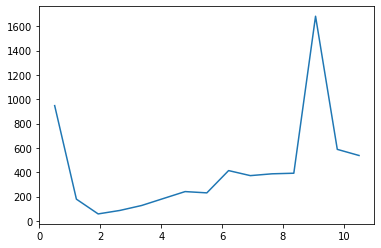

In [ ]:
# However, if the period grid is too coarse, the correct period might be missed.
model = BoxLeastSquares(t * u.day, y, dy=0.01)
periods = np.linspace(0.5, 10.5, 15) * u.day
periodogram = model.power(periods, 0.2)
plt.plot(periodogram.period, periodogram.power)  

**Peak Statistics**

In [ ]:
# The compute_stats method can be used to calculate several statistics of a candidate transit.
model = BoxLeastSquares(t * u.day, y, dy=0.01)
periodogram = model.autopower(0.2)
max_power = np.argmax(periodogram.power)
stats = model.compute_stats(periodogram.period[max_power],
                            periodogram.duration[max_power],
                            periodogram.transit_time[max_power])

**Function**

In [ ]:
def BLS(periodgrid,durationgrid,lightcurve):
  '''
  Purppose
  ------------------
  A Box Least Squares function to print out the compute stats of the periodogram.

  Parameters 
  -------------------
  Period grid       - describes how often a transit is happening
  Duration Grid     - describes the width of a transit
  Lightcurve        - lightkurve class object

  Return
  ------------------
  Calculate the peak using the method compute_stats.
  '''
 
  # assinging parameters to variables.
  period = periodgrid
  lc = lightcurve

  # t = timestamps
  t = durationgrid * u.day
  # y = observations
  y = lc * u.dimensionless_unscaled  # indicate quantities that do not have a physical dimension

  # assigned to a BLS object
  model = BoxLeastSquares(t , y , dy=lc.flux_err) # dy is the uncertainty
  periodogram = model.autopower(period,durationgrid)

  #calculates the maximum statstics within the transit for period, duration, and transit time
  max_power = np.argmax(periodogram.power)
  stats = model.compute_stats(periodogram.period[max_power],
                            periodogram.duration[max_power],
                            periodogram.transit_time[max_power])
  
  # stats is the one peak, periodgram is the arrays
  return stats, periodogram

In [ ]:
def periods(N=1000):
  period=np.logspace(-0.523, 1.43, N, endpoint=True)
  return period

def duration_grid(N=10):
  duration=np.linspace(.01, 0.298, N)
  return duration

In [ ]:
pd = periods(N=1000)
dg = duration_grid(N=10)